<a href="https://colab.research.google.com/github/sarahloree/Project-2--Bank-Loan-Marketing-Model/blob/main/AIML_ML_Project_low_code_notebook_LASATER%2CSARAH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective
To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## **Please read the instructions carefully before starting the project.**

This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [ ]:
# uncomment the following lines if Google Colab is being used
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
Loan = pd.read_csv("/content/drive/MyDrive/Machine Learning /PROJECT 2/Loan_Modelling.csv")   ##  Complete the code to read the data

In [ ]:
# copying data to another variable to avoid any changes to original data
data = Loan.copy()

## Data Overview

### View the first and last 5 rows of the dataset.

In [ ]:
data.head(5)  ##  Complete the code to view top 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
data.tail(5)  ##  Complete the code to view last 5 rows of the data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Understand the shape of the dataset.

In [ ]:
data.shape  ## Complete the code to get the shape of the data

(5000, 14)

### Check the data types of the columns for the dataset

In [ ]:
data.info()  ##  Complete the code to view the datatypes of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Checking the Statistical Summary

In [ ]:
data.describe(include="all").T  ## Complete the code to print the statistical summary of the data

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


### Dropping columns

In [ ]:
data = data.drop(["ID"], axis=1)  ## Complete the code to drop a column from the dataframe

## Data Preprocessing

### Checking for Anomalous Values

In [ ]:
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43])

In [ ]:
# checking for experience <0
data[data["Experience"] < 0]["Experience"].unique()

array([-1, -2, -3])

In [ ]:
# Correcting the experience values
data["Experience"].replace(-1, 1, inplace=True)
data["Experience"].replace(-2, 2, inplace=True)
data["Experience"].replace(-3, 3, inplace=True)

In [ ]:
data["Education"].unique()

array([1, 2, 3])

### Feature Engineering

In [ ]:
# checking the number of uniques in the zip code
data["ZIPCode"].nunique()

467

In [ ]:
data["ZIPCode"] = data["ZIPCode"].astype(str)
print(
    "Number of unique values if we take first two digits of ZIPCode: ",
    data["ZIPCode"].str[0:2].nunique(),
)
data["ZIPCode"] = data["ZIPCode"].str[0:2]

data["ZIPCode"] = data["ZIPCode"].astype("category")

Number of unique values if we take first two digits of ZIPCode:  7


In [ ]:
## Converting the data type of categorical features to 'category'
cat_cols = [
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
    "ZIPCode",
]
data[cat_cols] = data[cat_cols].astype("category")

## <a name='link2'>Exploratory Data Analysis (EDA)</a>


### Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

#### Observations on Age

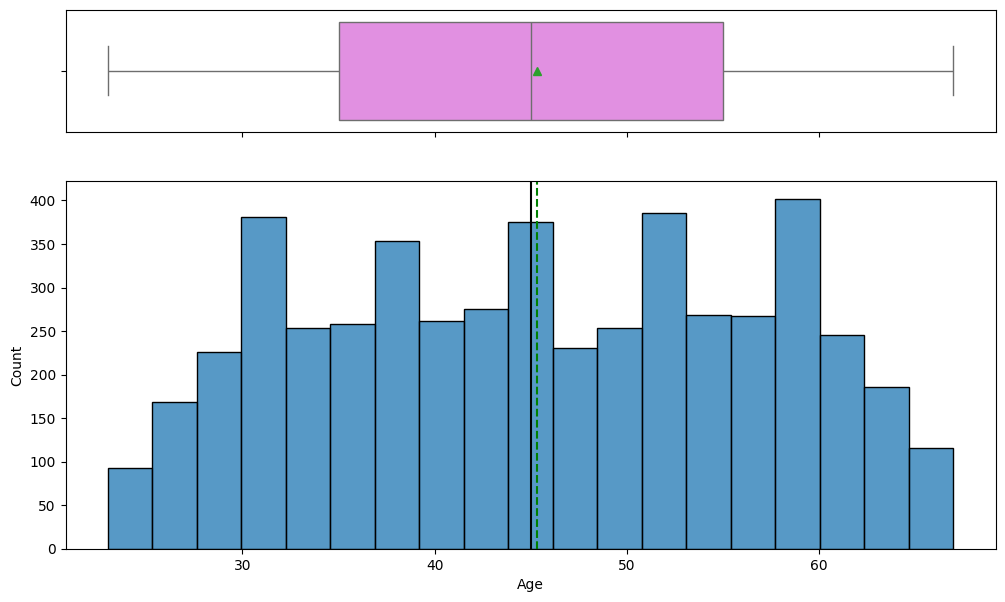

In [ ]:
histogram_boxplot(data, "Age")

**OBSERVATIONS:** 50% of customers fall between about 35 and about 54 years of age, with the median age being about 45 and the average being slightly higher at around 45.3 years of age.

#### Observations on Experience

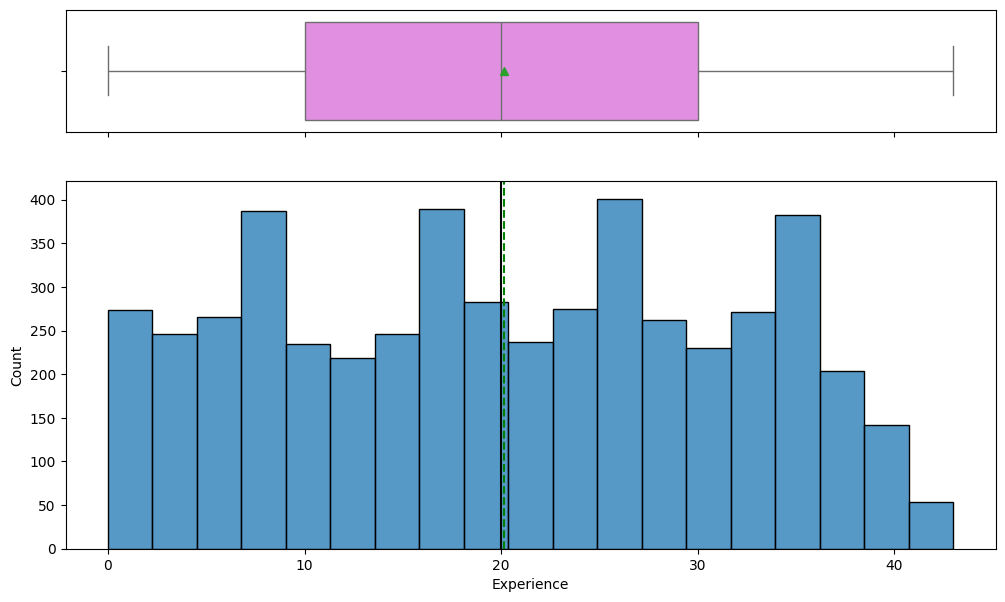

In [ ]:
histogram_boxplot(data,"Experience") ## Complete the code to create histogram_boxplot for experience

**OBSERVATIONS:** 50% of customers have between 10 and 30 years of professional experience with the average falling right at 20 years of professional experience.

#### Observations on Income

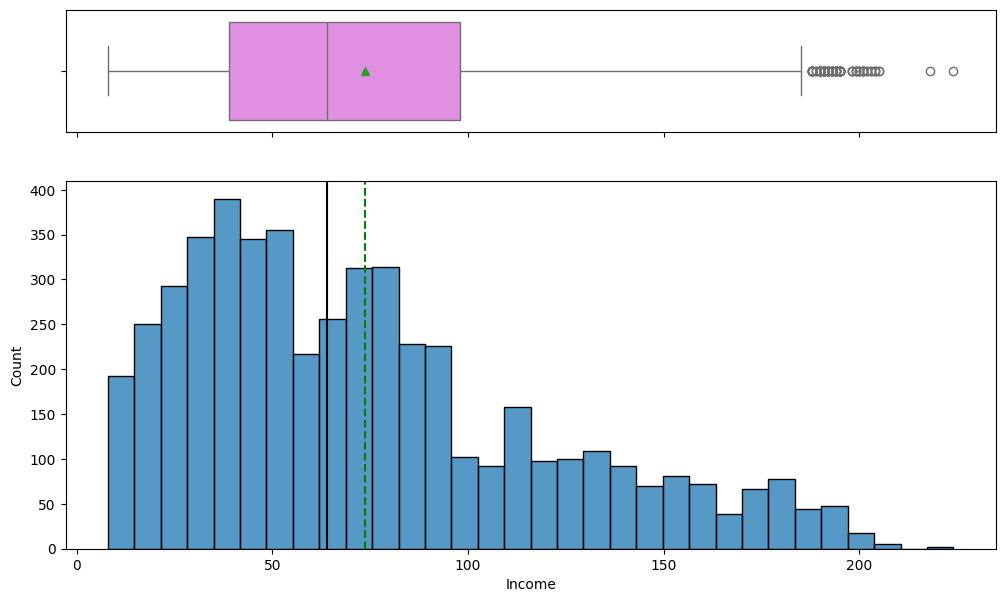

In [ ]:
histogram_boxplot(data, "Income")  ## Complete the code to create histogram_boxplot for Income

**OBSERVATIONS:** 50% of customers income falls between 30,000 and 95,000 with the median being about 64,000 and average income being around 73,700.

#### Observations on CCAvg

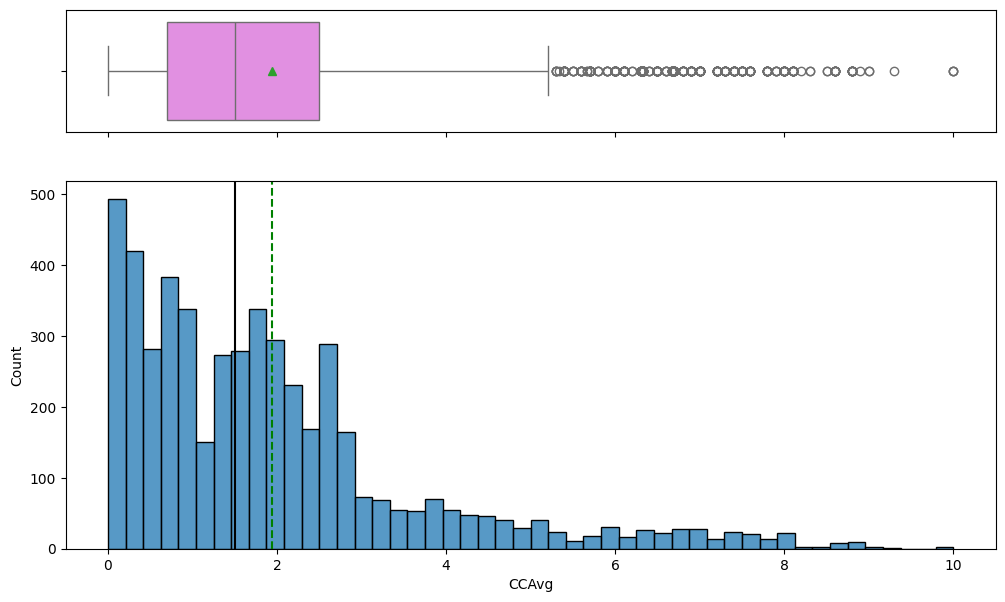

In [ ]:
histogram_boxplot(data, "CCAvg")  ## Complete the code to create histogram_boxplot for CCAvg

**OBSERVATIONS:** 50% of customers spend an average of 750 to 2,500 per month on credit card usage with the average expenditure being 1,900 and median falling at 1,500. However, there are also many outlier customers spending between 5,000 to 10,000 per month.

#### Observations on Mortgage

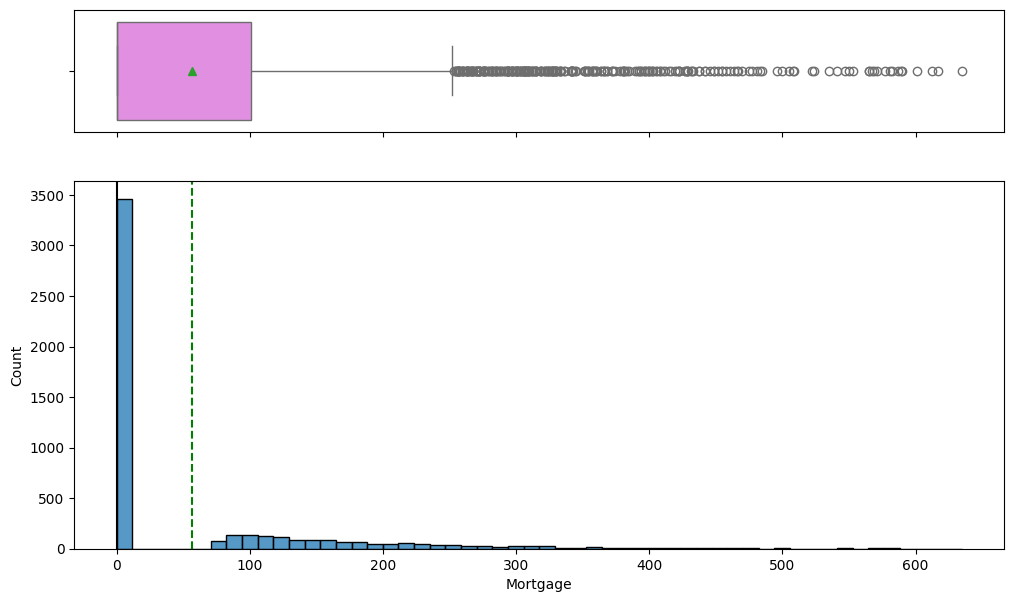

In [ ]:
histogram_boxplot(data, "Mortgage")  ## Complete the code to create histogram_boxplot for Mortgage

**OBSERVATIONS:** 50% of customer mortgages fall between 0 - 100,000 with the average mortgage falling around 56,500. There are however also many customer outliers with mortgages falling between 250,000 and the maximum of 635,000.  

#### Observations on Family

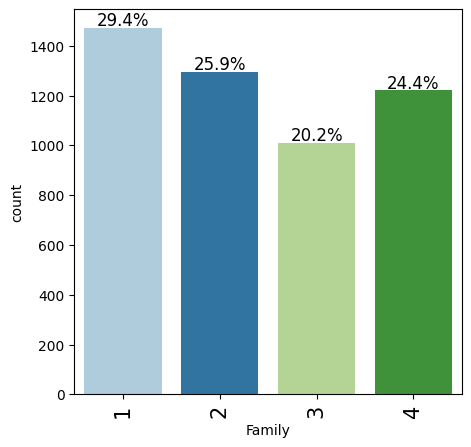

In [ ]:
labeled_barplot(data, "Family", perc=True)

**OBSERVATIONS:** With only options 1 through 4 available, family sizes of 1 rank highest at 29.4%, 2 in second at 25.9%, 4 in third at 24.4%, and 3 in fourth at 20.2%.

#### Observations on Education

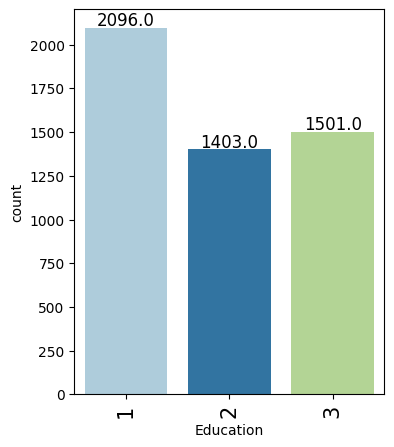

In [ ]:
labeled_barplot(data, "Education")   ## Complete the code to create labeled_barplot for Education

**OBSERVATIONS:** Without yet knowing what the categorical dummy values of 1, 2 and 3 have been created to represent, it can be observed that the highest number of customers at 2,096 have an education category of 1, the second highest number at 1,501 have an education category of 3, and the lowest number at 1,403 have an education rank of 2.

#### Observations on Securities_Account

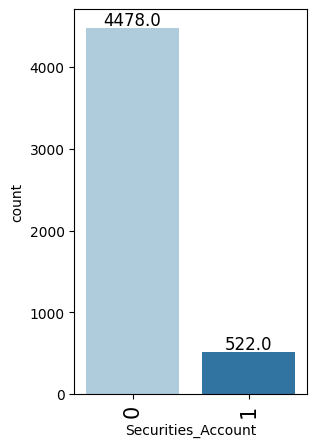

In [ ]:
labeled_barplot(data, "Securities_Account")   ## Complete the code to create labeled_barplot for Securities_Account

**OBSERVATIONS:** Assuming that 0 represents "No" value and 1 represents "Yes" value in this circumstance, 4,478 customers do not have a securities account and 522 customers do have one.

#### Observations on CD_Account

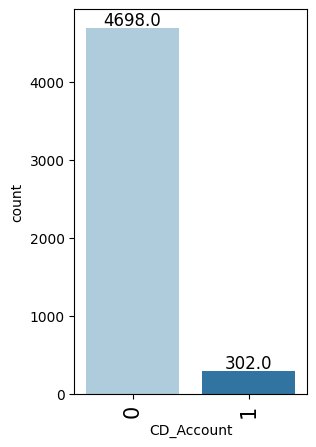

In [ ]:
labeled_barplot(data, "CD_Account")   ## Complete the code to create labeled_barplot for CD_Account

**OBSERVATIONS:** Assuming that 0 represents "No" value and 1 represents "Yes" value in this circumstance, 4,698 customers do not have a securities account and 302 customers do have one.

#### Observations on Online

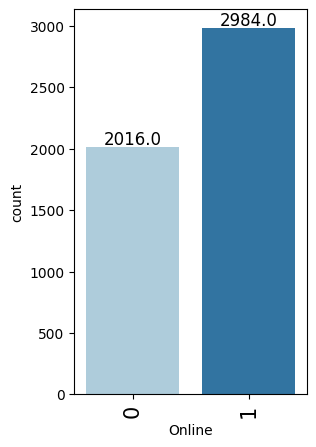

In [ ]:
labeled_barplot(data, "Online")   ## Complete the code to create labeled_barplot for Online

**OBSERVATIONS:** Assuming that 0 represents "No" value and 1 represents "Yes" value in this circumstance, 2,016 customers do not use online banking and 2,984 customers do use it.

#### Observation on CreditCard

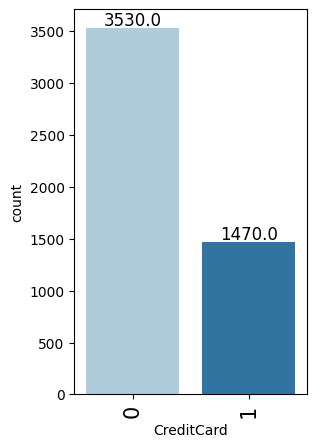

In [ ]:
labeled_barplot(data, "CreditCard")   ## Complete the code to create labeled_barplot for CreditCard

**OBSERVATIONS:** Assuming that 0 represents "No" value and 1 represents "Yes" value in this circumstance, 3,530 customers do not have another credit card issued by any other bank and 1,470 customers do have one.

#### Observation on ZIPCode

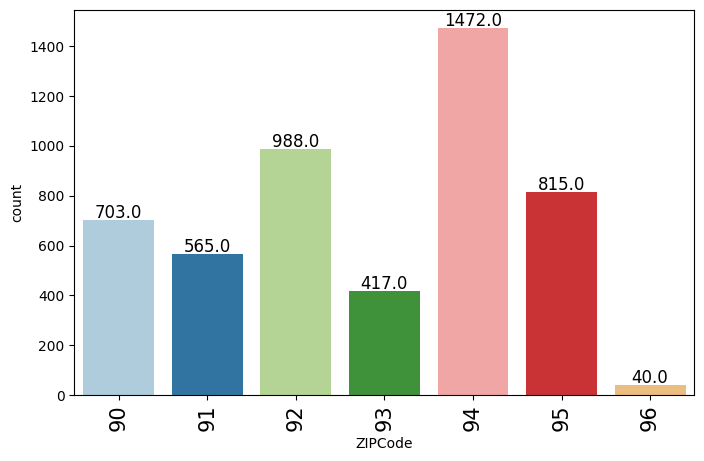

In [ ]:
labeled_barplot(data, "ZIPCode")   ## Complete the code to create labeled_barplot for ZIPCode

**OBSERVATIONS:** The barplot data indicates that the 7 unique zipcodes rank from highest number of customers to lowest number of customers as follows:


1.   94: 1,472 customers
2.   92: 988 customers
3.   95: 815 customers
4.   90: 703 customers
5.   91: 565 customers
6.   93: 417 customers
7.   96: 40 customers



### Bivariate Analysis

In [ ]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

#### Correlation check

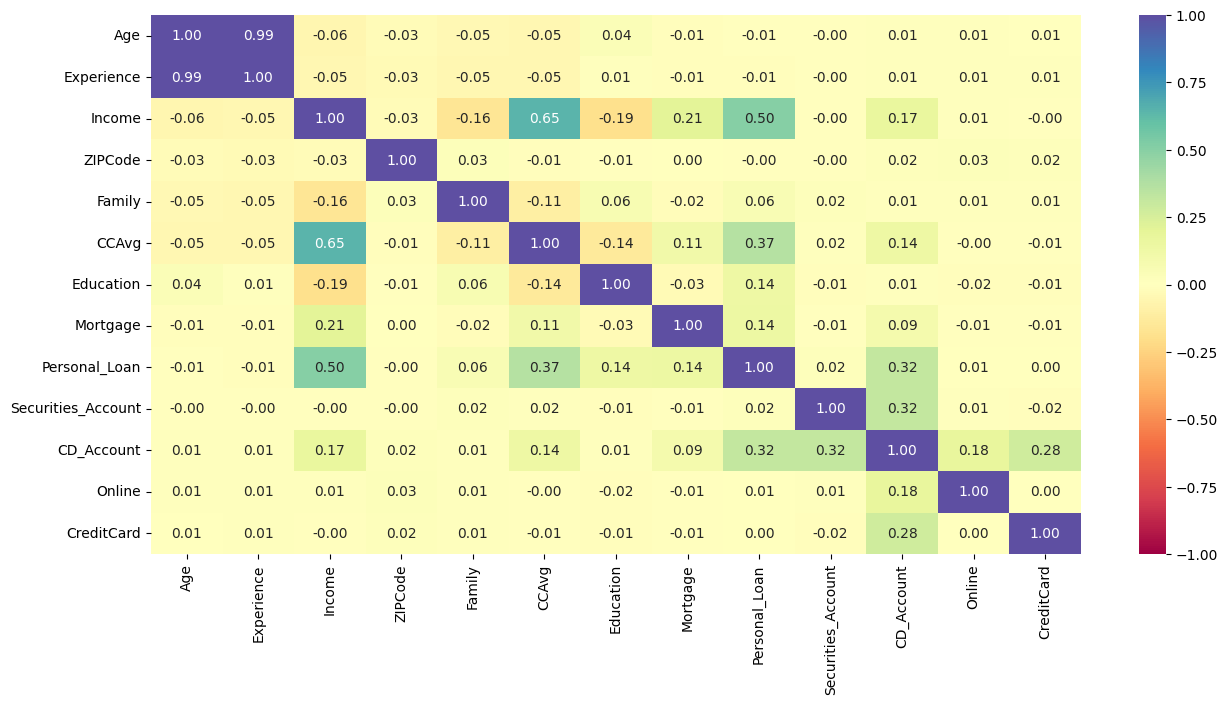

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral") # Complete the code to get the heatmap of the data
plt.show()

**OBSERVATIONS:** Features with highest positive correlation:


1.   Age, Experience: 0.99
2.   Income, CCAvg: 0.65
3.   Income, Personal_Loan: 0.50

Features with highest negative correlations:


1.   Income, Education: -0.19
2.   Income, Family: -0.16
3.   Education, CCAvg: -0.14

**CONCLUSIONS:**


*   Age and experience are nearly perfectly positively correlated- the older one is, the more work experience they will have gained.
*   Income and monthly credit card spending are relatively highly positively correlated- the level of income one earns strongly influences their average spending on credit cards per month.
*   Income and personal loans are also relatively highly positively correlated- the higher income one earns, the higher the instance the customer accepted the personal loan offered in the last campaign.
*   Income and education are slightly negatively correlated- the less education one has had, the lower their earned income level.
*   Income and family size are also slightly negatively correlated- the lower the number of family members in the household, the lower the level of income being earned.
*   Lastly, education and monthly credit card spending have a slight negative correlation- the education level one has has a slight negative affect on their average monthly credit card expenses.


#### Let's check how a customer's interest in purchasing a loan varies with their education

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


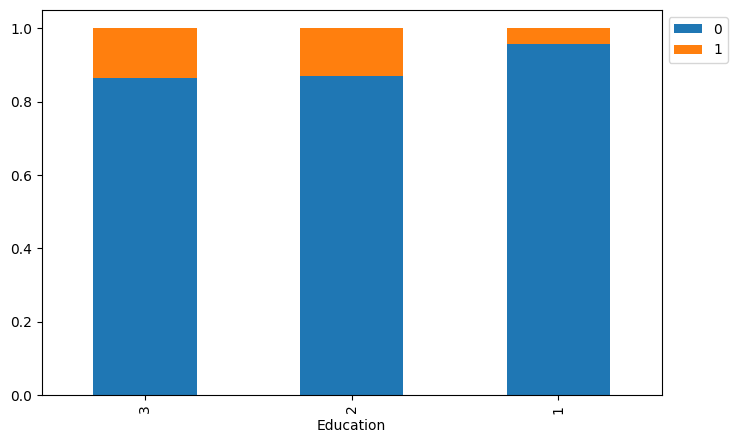

In [ ]:
stacked_barplot(data, "Education", "Personal_Loan")

**OBSERVATIONS:**

1.   Customers with an education level 1 (2,096 customers): No loan= 2,003 / Yes loan= 93
2.   Customers with an education level 2 (1,403 customers): No loan= 1,221 / Yes loan= 182
3. Customers with an education level 3 (1,501 customers): No loan= 1,296 / Yes loan= 205

**CONCLUSIONS:**

Customers with education levels of 2 and 3 have the highest rate of taking personal loans at a total of 387 loans vs 93 total loans taken for education level 1, which is the education level with the highest number of customers at 2,096.




#### Personal_Loan vs Family

Family            1     2     3     4   All
Personal_Loan                              
All            1472  1296  1010  1222  5000
0              1365  1190   877  1088  4520
1               107   106   133   134   480
------------------------------------------------------------------------------------------------------------------------


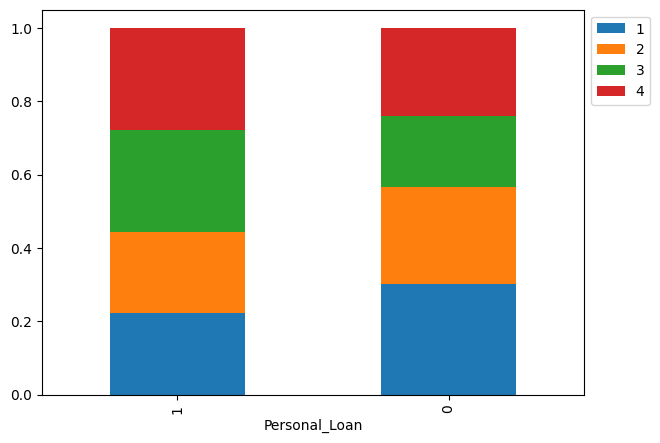

In [ ]:
stacked_barplot(data, "Personal_Loan", "Family")  ## Complete the code to plot stacked barplot for Personal Loan and Family

**OBSERVATIONS:**

Yes (1)- The category of personal loan holders that has the highest count of loans is the family category of 4 with 134, with category 3 having just one less loan holder at 133.

No (0)- The family category that has the highest instance of not taking out a personal loan is category 1 with a count of 1,365 customers, with category 2 having a count of 1,190.

**CONCLUSIONS:**

The barplot demonstrates that families with higher numbers of members are more likely to take out personal loans, indicating the need for additional income to supplement the difference needed to support a household with more individuals present.

The barplot also demonstrates that families with a lower number of members are less likely to take out a personal loan, indicating the lack of need to supplement any missing income due to the fact that the household includes less individuals to support.

#### Personal_Loan vs Securities_Account

Securities_Account     0    1   All
Personal_Loan                      
All                 4478  522  5000
0                   4058  462  4520
1                    420   60   480
------------------------------------------------------------------------------------------------------------------------


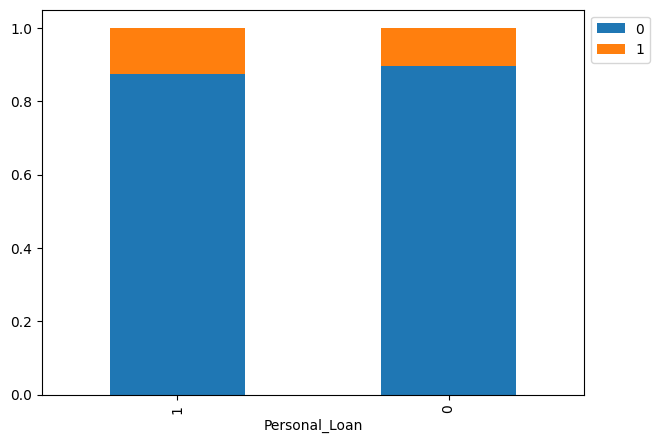

In [ ]:
stacked_barplot(data, "Personal_Loan", "Securities_Account") ## Complete the code to plot stacked barplot for Personal Loan and Securities_Account

**OBSERVATIONS:**

The barplot indicates that of the 480 bank customers with a personal loan, 60 of them also have a securities account. This is 12.5% of the personal loan holders.

The barplot also indicates that of the 4,520 customers that do not have a personal loan, 462 of them do have a securities account. This is 10.2% of non-loan-holders or a total of 9.2% of the total number of 5,000 bank customers.  

**CONCLUSIONS:**
Customers with a personal loan have a higher proportion (12.5%) of having a securities account compared to those without a personal loan (10.2%). This suggests a potential association where personal loan holders are somewhat more likely to have a securities account. Of the total customer base, 9.2% have a securities account, indicating that a significant portion of customers, regardless of their loan status, hold securities accounts.

#### Personal_Loan vs CD_Account

CD_Account        0    1   All
Personal_Loan                 
All            4698  302  5000
0              4358  162  4520
1               340  140   480
------------------------------------------------------------------------------------------------------------------------


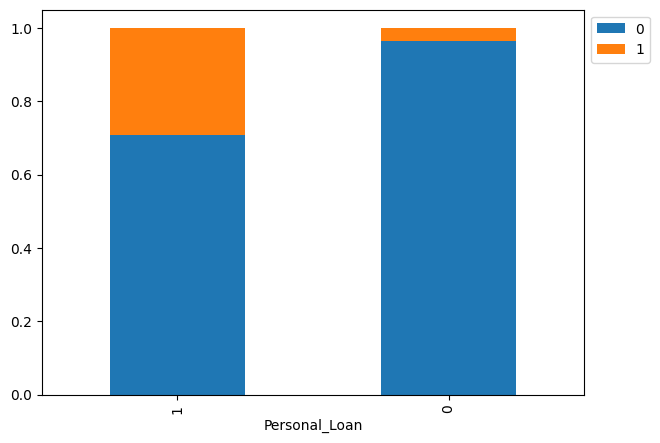

In [ ]:
stacked_barplot(data, "Personal_Loan", "CD_Account") ## Complete the code to plot stacked barplot for Personal Loan and CD_Account

**OBSERVATIONS:**

Of the bank's 480 personal loan holders, 140 of those have a CD account as well. This is a rate of 29%.

Of the bank's 4,520 customers that do not have a personal loan, 162 of them do have a CD account. This is a rate of 3%.

The total number of bank customers with a CD account is 302, which is right at 6%.

**CONCLUSIONS:**

It can be concluded that the rate of instance of personal loan holders also having a CD account is relatively high with nearly one in 3 having both. In comparison to the overall number of 302 for the total general bank customer population of 5,000 standing at 6%, this indicates that almost half of the total CD account holders are also personal loan holders.

#### Personal_Loan vs Online

Online            0     1   All
Personal_Loan                  
All            2016  2984  5000
0              1827  2693  4520
1               189   291   480
------------------------------------------------------------------------------------------------------------------------


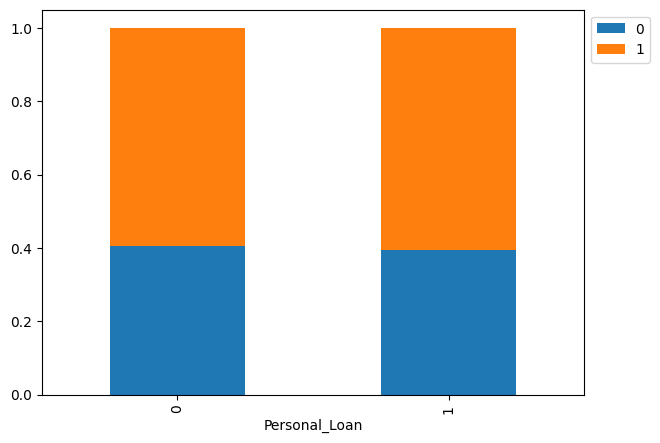

In [ ]:
stacked_barplot(data, "Personal_Loan", "Online") ## Complete the code to plot stacked barplot for Personal Loan and Online

**OBSERVATIONS:**

Of the bank's 480 personal loan holders, 291 bank online while 189 do not. This is 60% of personal loan holders.

Of the bank's 4,520 customers that do not have a personal loan, 2,693 bank online while 1,827 do not. This is 40.4% of customers that do not have a personal loan. The total number of 2,016 customers that do not utilize the bank's online platform is 40% of total banking customers.

**CONCLUSIONS:**

At a rate of 60%, a significant proportion of personal loan holders use the bank's online platform, which is notably higher than the 40.4% of non-personal loan holders who use the online banking service. This suggests that personal loan holders are more inclined towards using online banking. The percentage of personal loan holders who bank online (60%) is higher compared to the overall online banking usage rate (60% vs. 40%). This indicates that personal loan holders are more likely to utilize online banking services compared to the average customer.


#### Personal_Loan vs CreditCard

CreditCard        0     1   All
Personal_Loan                  
All            3530  1470  5000
0              3193  1327  4520
1               337   143   480
------------------------------------------------------------------------------------------------------------------------


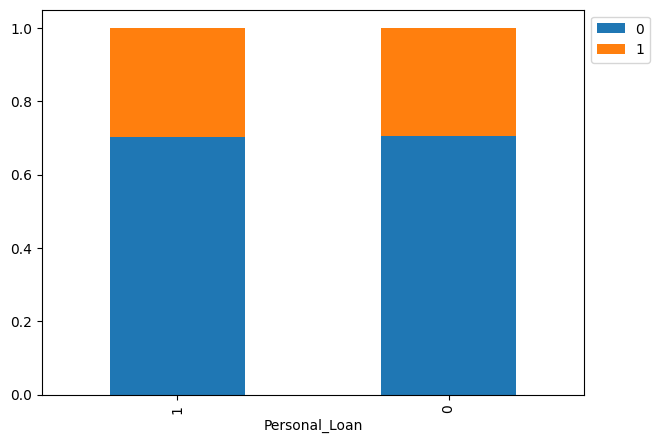

In [ ]:
stacked_barplot(data, "Personal_Loan", "CreditCard") ## Complete the code to plot stacked barplot for Personal Loan and CreditCard

**OBSERVATIONS:**

Of the 480 bank customers that have a personal loan, 143 (29.7%) have a credit card issued by another bank. Of the 4,520 customer base that does not have a loan, 1,327 (29.3%) do have a credit card issued by another bank. A total of 1,470 customers have a credit card issued by another bank, leaving 3,530 customers that do not have one. 29.4% of all the bank's customers have a credit card issued by another bank.

**CONCLUSIONS:**

The percentage of personal loan holders with a credit card issued by another bank (29.7%) is very close to the percentage of non-personal loan holders with such a credit card (29.3%). This indicates that having a personal loan does not significantly impact the likelihood of holding a credit card from another bank compared to not having a personal loan. The overall percentage of customers with a credit card issued by another bank (29.4%) is consistent with the percentages observed among both personal loan holders and non-loan holders. This suggests that credit card ownership is fairly uniform across different customer segments within the bank. The data reveals that personal loan status does not have a significant impact on the likelihood of holding a credit card from another bank. Credit card ownership is relatively uniform across different segments of the bank's customer base.

#### Personal_Loan vs ZIPCode

ZIPCode         90   91   92   93    94   95  96   All
Personal_Loan                                         
All            703  565  988  417  1472  815  40  5000
0              636  510  894  374  1334  735  37  4520
1               67   55   94   43   138   80   3   480
------------------------------------------------------------------------------------------------------------------------


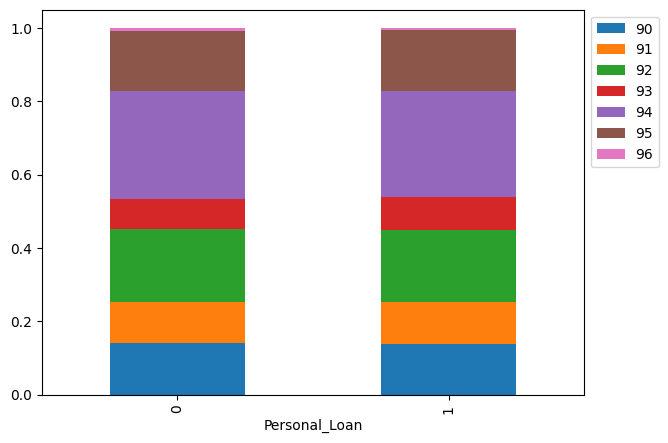

In [ ]:
stacked_barplot(data, "Personal_Loan", "ZIPCode") ## Complete the code to plot stacked barplot for Personal Loan and ZIPCode

**OBSERVATIONS:**

Of the 480 customers that have a personal loan:
1.   94- 138 (28.7%)
2.   92- 94 (19.5%)
3.   95- 80 (16.6%)
4.   90- 67 (13.9%)  
5.   91- 55 (11.4%)   
6.   93- 43 (8.9%)  
7.   96- 3  (0.6%)

Of the 4,520 customers that don't have a personal loan:

1.   94- 1334 (29.5%)
2.   92- 894  (19.7%)
3.   95- 735 (16.2%)
4.   90- 636  (14%)
5.   91- 510  (11.2%)
6.   93- 374  (8.2%)
7.   96- 37  (0.8%)

ZIP Code 94 is the most common in both groups, representing 28.7% of personal loan holders and 29.5% of non-loan holders.
ZIP Code 92 and ZIP Code 95 also have a significant presence in both groups, with slightly higher proportions among non-loan holders compared to loan holders.
ZIP Code 96 is the least represented in both groups, with only 0.6% of loan holders and 0.8% of non-loan holders.

**CONCLUSIONS:**

The distribution of ZIP codes among personal loan holders and non-loan holders is nearly identical across the categories. For each ZIP code range, the percentages of customers with and without personal loans are closely aligned. Since ZIP code distribution does not show significant variation between loan holders and non-holders, targeting customers based on their ZIP code alone may not be effective for increasing personal loan uptake. Other factors beyond geographic location might be more influential in determining personal loan eligibility or interest.

#### Let's check how a customer's interest in purchasing a loan varies with their age

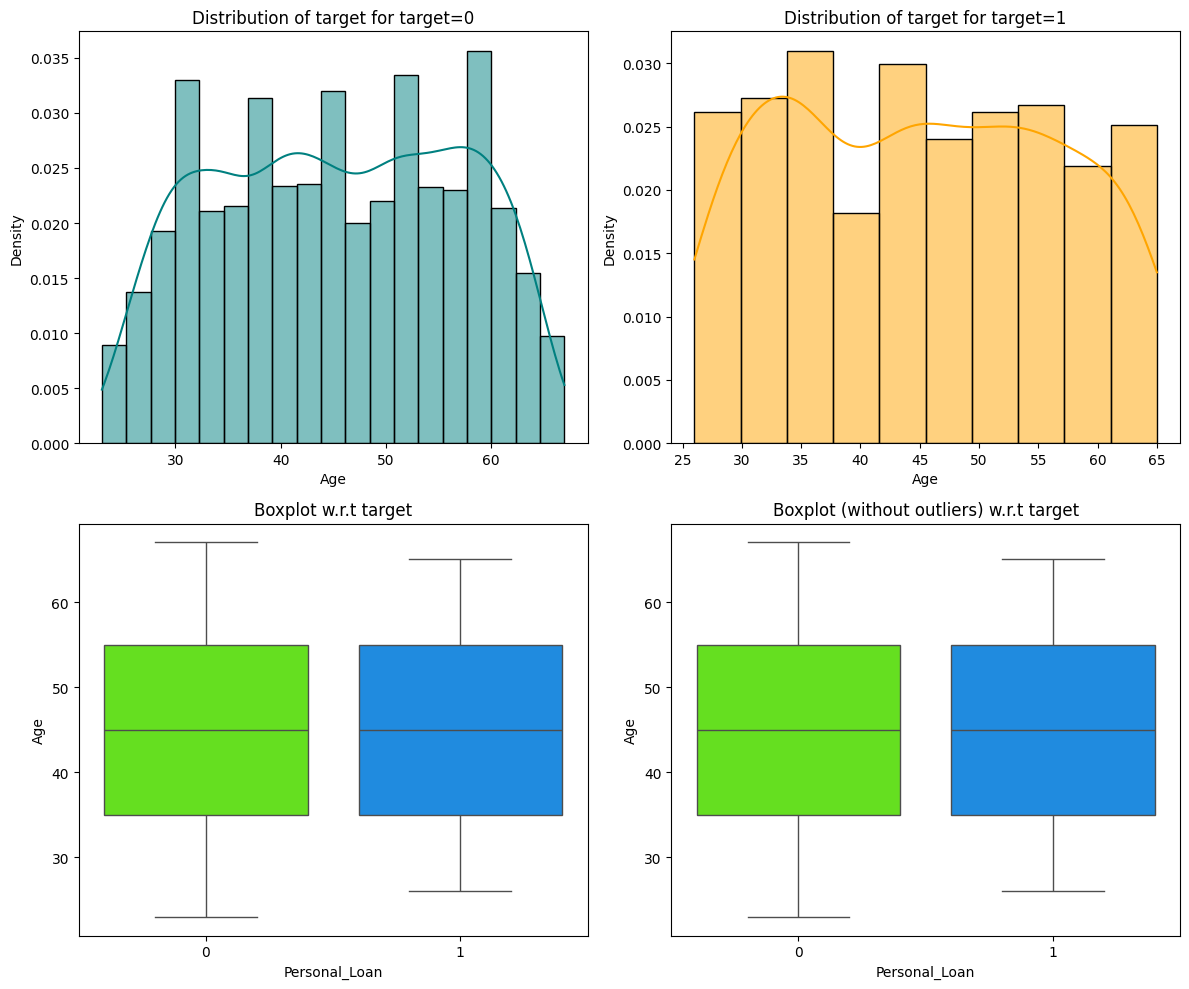

In [ ]:
distribution_plot_wrt_target(data, "Age", "Personal_Loan")

**OBSERVATIONS:**

Ages 26 - 65 represented on both targets 0 and 1

Personal loan: 50% of customers between 35-55 with a median age of 45.


No personal loan: 50% of customers between 35-55 with a median age of 45.


(Without outliers)

Personal loan: 50% of customers between 35-55 with a median age of 45.


No personal loan: 50% of customers between 35-55 with a median age of 45.

**CONCLUSIONS:**

For both customers with personal loans and those without, the age profile is consistent, indicating that age does not significantly differentiate between these two groups. The central tendency and the interquartile range are identical for both categories, reinforcing that age alone does not determine personal loan ownership. Other variables should be examined to better understand personal loan ownership patterns.

#### Personal Loan vs Experience

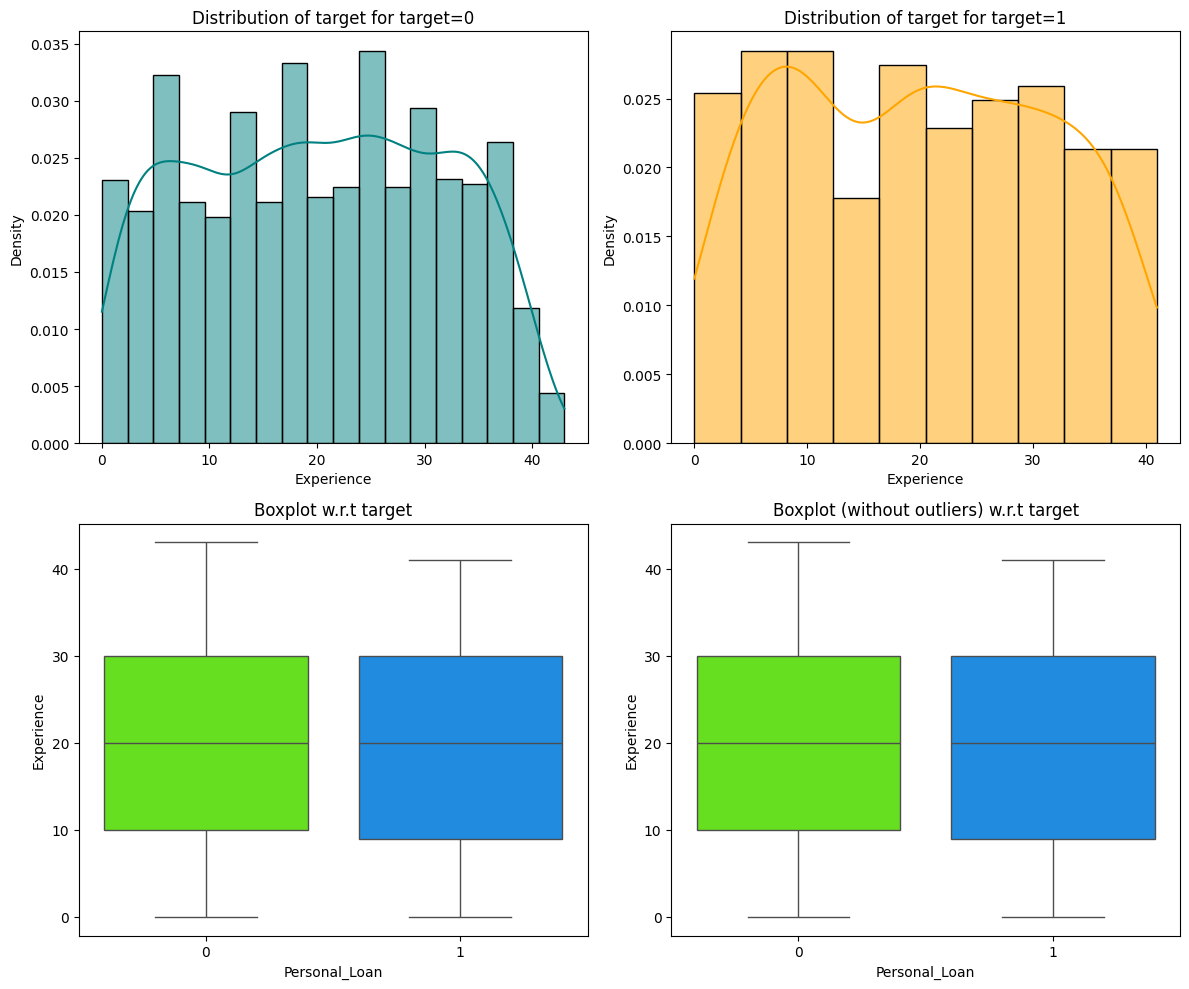

In [ ]:
distribution_plot_wrt_target(data, "Experience", "Personal_Loan") ## Complete the code to plot stacked barplot for Personal Loan and Experience

**OBSERVATIONS:**

Work experience years 0 - 45 represented on distribution plot target 0 and 0-41 or 42 years on distribution plot target 1

Personal loan: 50% of customers between 9 - 30 years work experience shown on w.r.t target boxplot.


No personal loan: 50% of customers between between 10 - 30 years work experience shown on w.r.t target boxplot.


(Without outliers)

Personal loan: 50% of customers between 9 - 30 years work experience shown on w.r.t target boxplot without outliers.


No personal loan: 50% of customers between between 10 - 30 years work experience shown on w.r.t target boxplot without outliers.

**CONCLUSIONS:**

The work experience distribution for customers with personal loans is slightly skewed towards those with less experience (minimum 0 years and up to 41 or 42 years), while non-loan holders have a slightly broader experience range. The median experience years for both groups are relatively close at around 20 years. While there is considerable overlap in work experience between customers with and without personal loans, the personal loan holders generally have slightly less work experience.

#### Personal Loan vs Income

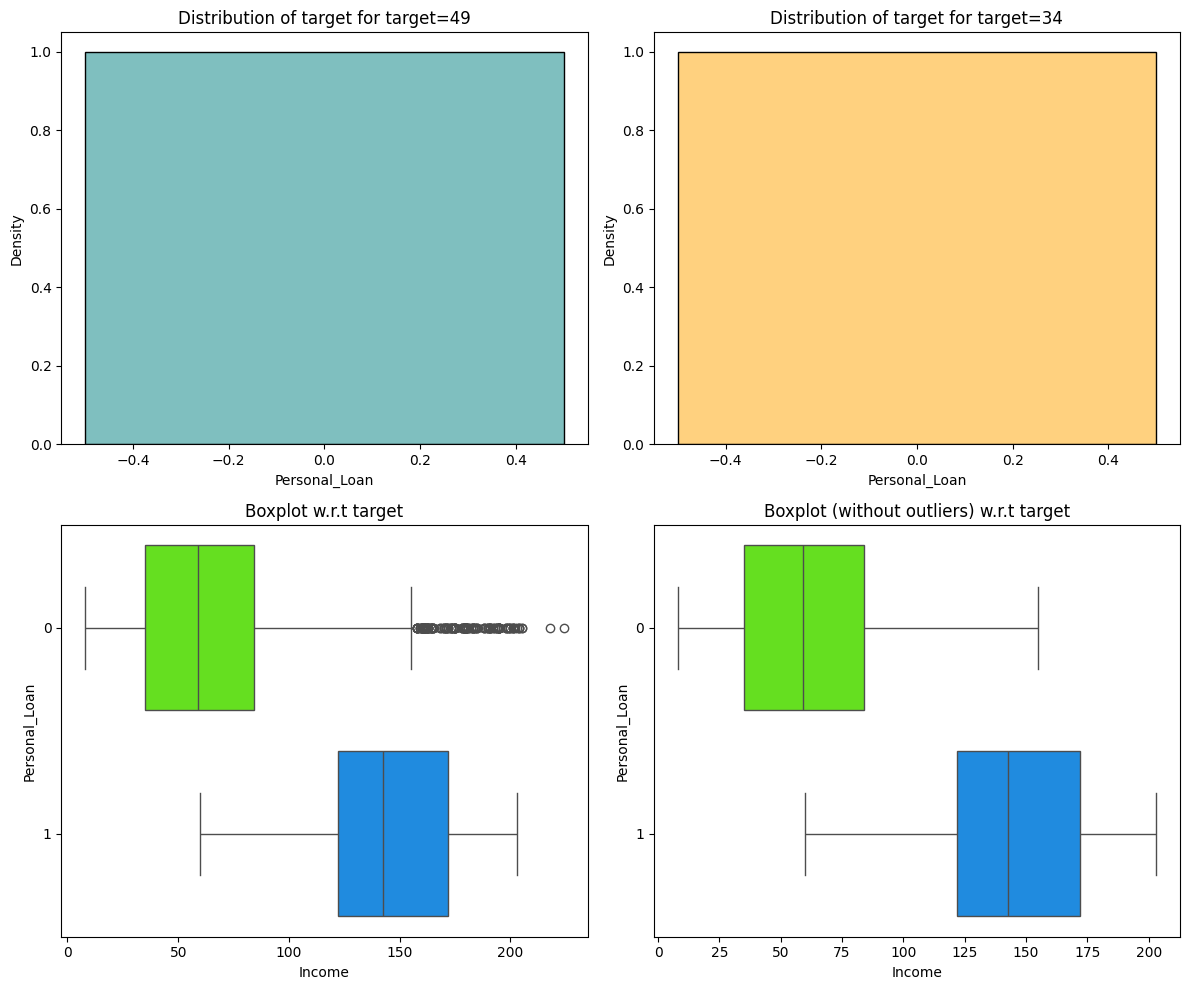

In [ ]:
distribution_plot_wrt_target(data, "Personal_Loan", "Income") ## Complete the code to plot stacked barplot for Personal Loan and Income

**OBSERVATIONS:**

Personal loan: 50% of customers between approximately 125,000 - approximately 175,000 income level shown on w.r.t target boxplot with a median income level around approximately 140,000.  

No personal loan: 50% of customers between approximately 30,000 - approximately 75,000 income level shown on w.r.t target boxplot with a median at around approximately 55,000 with many outliers above the approximately 155,000 income level.

(Without outliers)

Personal loan: 50% of customers between approximately 120,000 - approximately 170,000 shown on w.r.t target boxplot with a median income level around approximately 140,000 without outliers.

No personal loan: 50% of customers between approximately 37,500 - approximately 80,000 shown on w.r.t target boxplot with a median income level around approximately 60,000 without outliers.  

**CONCLUSIONS:**

Customers with a personal loan generally have a higher income compared to those without a personal loan. The 50th percentile (median) income for personal loan holders is around 140,000 while for non-loan holders it is around 55,000. This suggests that customers with personal loans tend to have higher incomes. There is a clear trend where higher-income individuals are more likely to hold personal loans. These conclusions suggest that income is a significant factor in determining whether a customer has a personal loan, with higher incomes being associated with a higher likelihood of holding a personal loan.

#### Personal Loan vs CCAvg

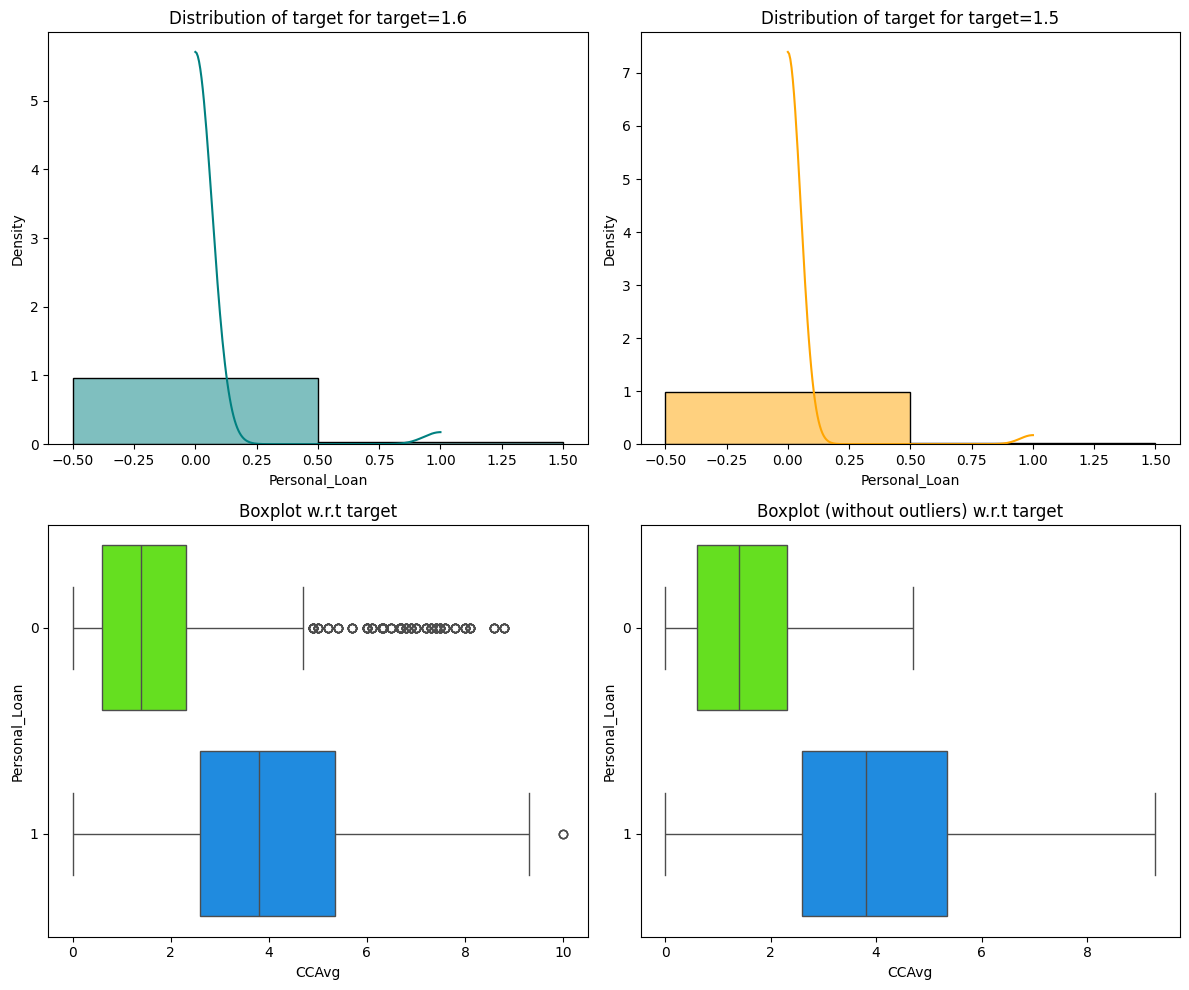

In [ ]:
distribution_plot_wrt_target(data, "Personal_Loan", "CCAvg") ## Complete the code to plot stacked barplot for Personal Loan and CCAvg

**OBSERVATIONS:**

Personal loan: 50% of customers show between approximately 2,500 - 5,500 average spending on credit cards per month shown on w.r.t target boxplot with a median average spending level around approximately 3,750.

No personal loan: 50% of customers between approximately 500 - 2,250 average spending on credit cards per month shown on w.r.t target boxplot with a median average monthly spending level around approximately 1,500 with many outliers spending as much as approximately 9,000.

(Without outliers)

Personal loan: 50% of customers show between approximately 2,500 - 5,500 average spending on credit cards per month shown on w.r.t target boxplot with a median average spending level around approximately 3,750.

No personal loan: 50% of customers between approximately 500 - 2,250 average spending on credit cards per month shown on w.r.t target boxplot with a median average monthly spending level around approximately 1,500.

**CONCLUSIONS:**

Customers with a personal loan generally spend more on their credit cards each month compared to those without a personal loan. For personal loan holders, the 50th percentile (median) average spending is around 3,750, whereas for non-loan holders, it is around 1,500. This suggests that personal loan holders tend to have higher monthly credit card expenditures. Non-loan holders include some high spenders, with outliers spending as much as $9,000 per month. This suggests that while the majority of non-loan holders spend less, there are a few individuals with exceptionally high spending, which influences the overall distribution. The data suggests that higher credit card spending is associated with having a personal loan, potentially indicating a higher level of financial engagement or borrowing behavior among these customers.

## Data Preprocessing (contd.)

### Outlier Detection

In [ ]:
Q1 = data.select_dtypes(include="number").quantile(0.25)  # To find the 25th percentile and 75th percentile.
Q3 = data.select_dtypes(include="number").quantile(0.75)

IQR = Q3 - Q1  # Inter Quantile Range (75th perentile - 25th percentile)

lower = (
    Q1 - 1.5 * IQR
)  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

In [ ]:
(
    (data.select_dtypes(include=["float64", "int64"]) < lower)
    | (data.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(data) * 100

,0
Age,0.00
Experience,0.00
Income,1.92
Family,0.00
CCAvg,6.48
Mortgage,5.82


### Data Preparation for Modeling

In [ ]:
# dropping Experience as it is perfectly correlated with Age
X = data.drop(["Personal_Loan", "Experience"], axis=1)
Y = data["Personal_Loan"]

X = pd.get_dummies(X, columns=["ZIPCode", "Education"], drop_first=True)

# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1
)

In [ ]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
Personal_Loan
0    0.905429
1    0.094571
Name: proportion, dtype: float64
Percentage of classes in test set:
Personal_Loan
0    0.900667
1    0.099333
Name: proportion, dtype: float64


## Model Building

### Model Evaluation Criterion

### Model Building

First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.

* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearnfunction will be used to plot confusion matrix.

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

#### Build Decision Tree Model

In [ ]:
model = DecisionTreeClassifier(criterion="gini", random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

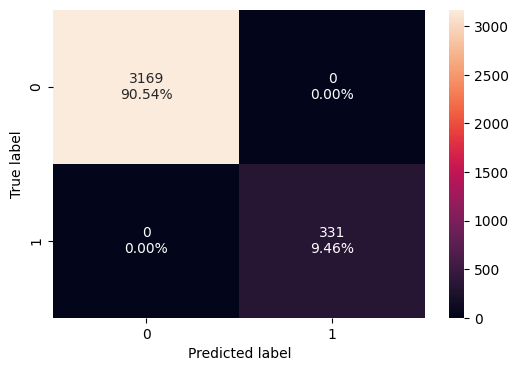

In [ ]:
confusion_matrix_sklearn(model, X_train, y_train)

In [ ]:
decision_tree_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
decision_tree_perf_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


#### Visualizing the Decision Tree

In [ ]:
feature_names = list(X_train.columns)
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Education_2', 'Education_3']


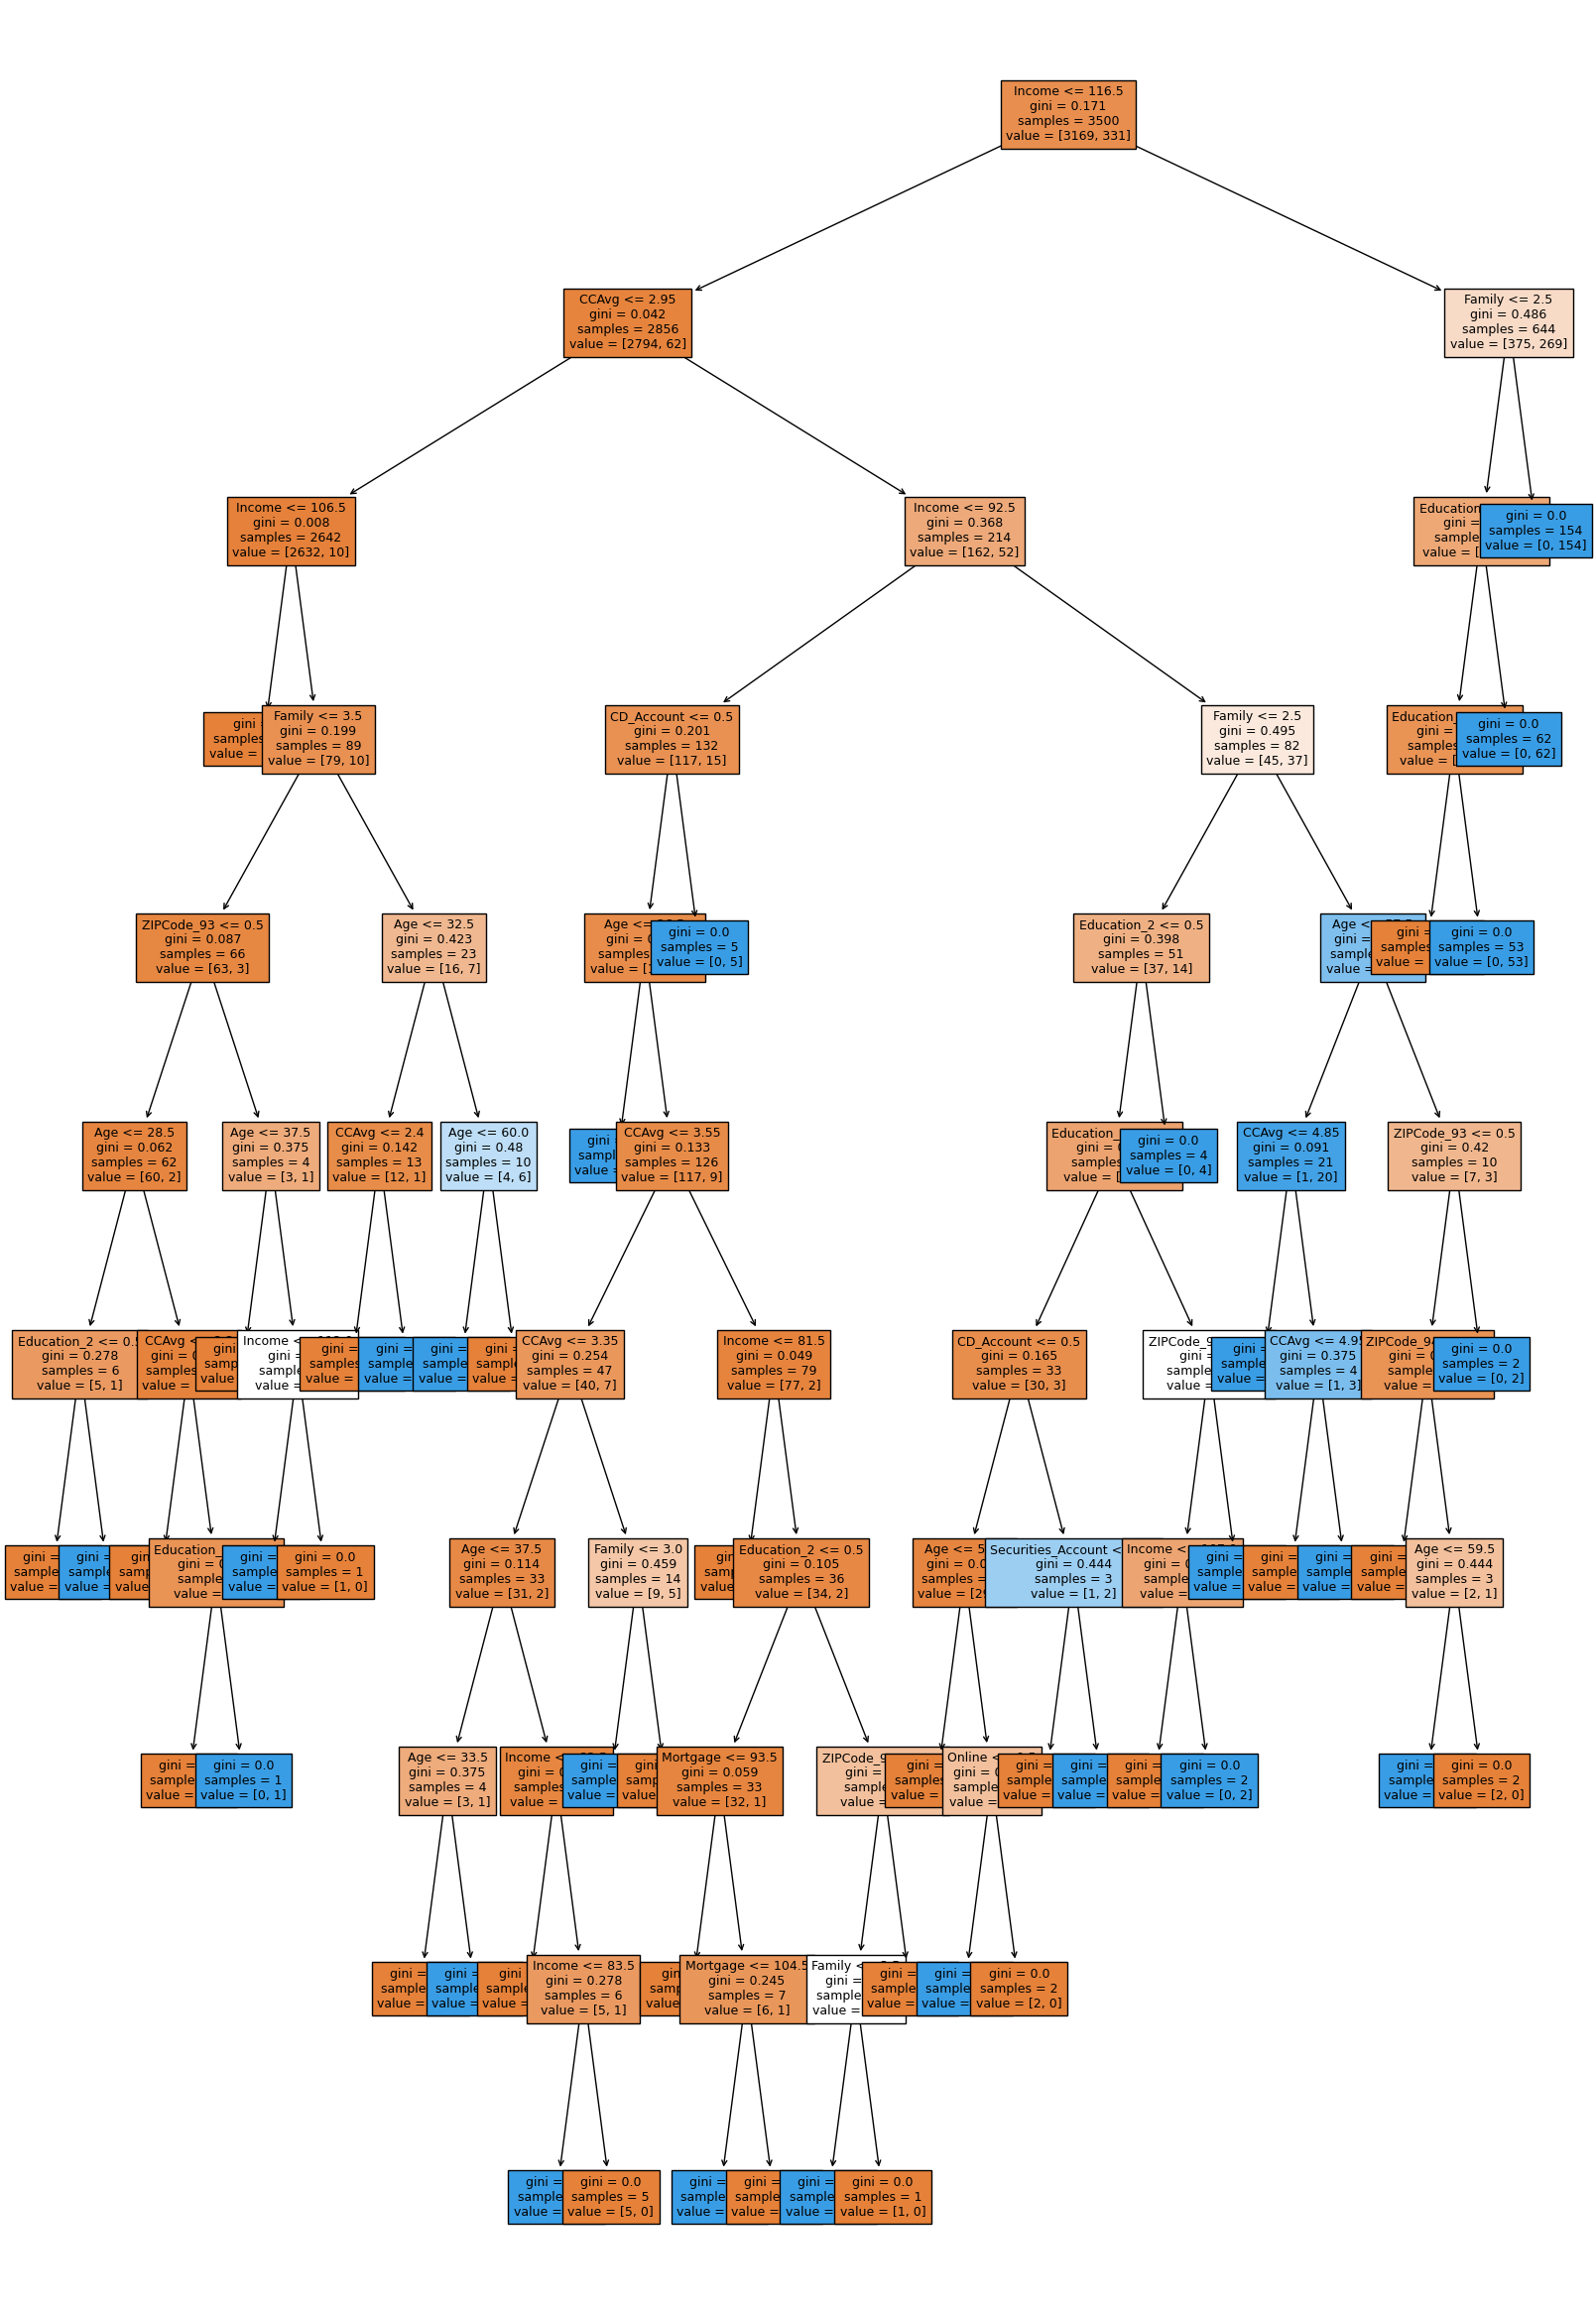

In [ ]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_2 <= 0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |   |--- Education_2 >  0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [7.00, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Age <= 37.50

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.308098
Family              0.259255
Education_2         0.166192
Education_3         0.147127
CCAvg               0.048798
Age                 0.033150
CD_Account          0.017273
ZIPCode_94          0.007183
ZIPCode_93          0.004682
Mortgage            0.003236
Online              0.002224
Securities_Account  0.002224
ZIPCode_91          0.000556
ZIPCode_92          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
CreditCard          0.000000


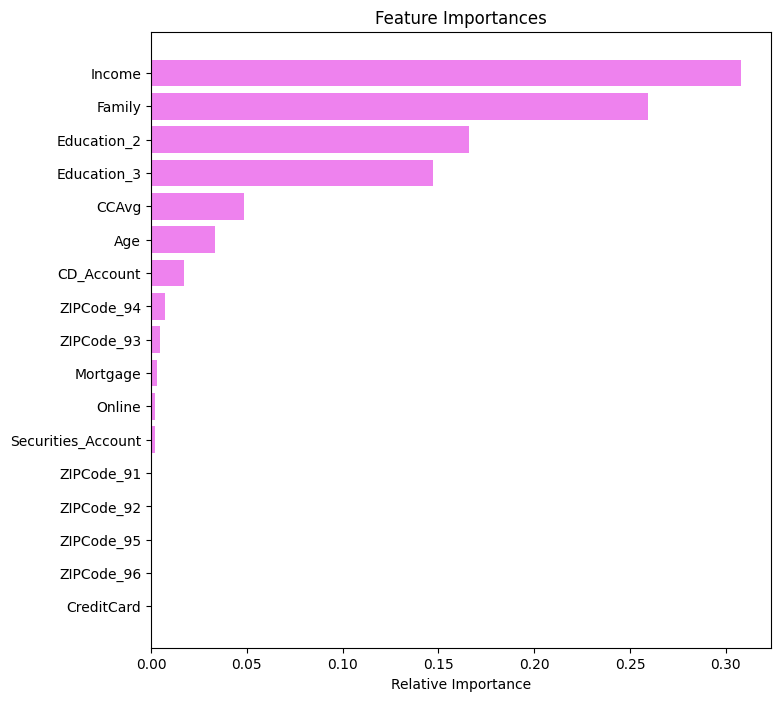

In [ ]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Checking model performance on test data

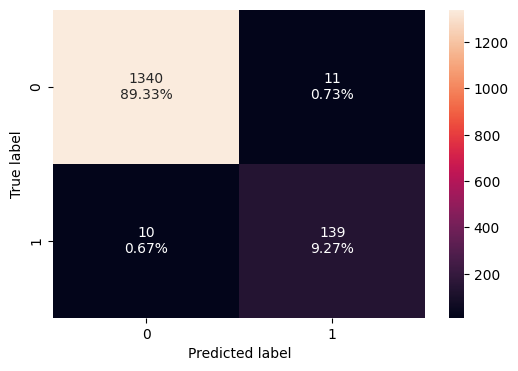

In [ ]:
confusion_matrix_sklearn(model, X_test, y_test) ## Complete the code to create confusion matrix for test data

In [ ]:
decision_tree_perf_test = model_performance_classification_sklearn(model, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_perf_test

,Accuracy,Recall,Precision,F1
0,0.986,0.932886,0.926667,0.929766


## Model Performance Improvement

#### Pre-Pruning

In [ ]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    "max_depth": np.arange(6, 15),
    "min_samples_leaf": [1, 2, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
}

# Type of scoring used to compare parameter combinations
acc_scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train, y_train) ## Complete the code to fit model on train data

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=10,
                       random_state=1)

**Checking performance on training data**

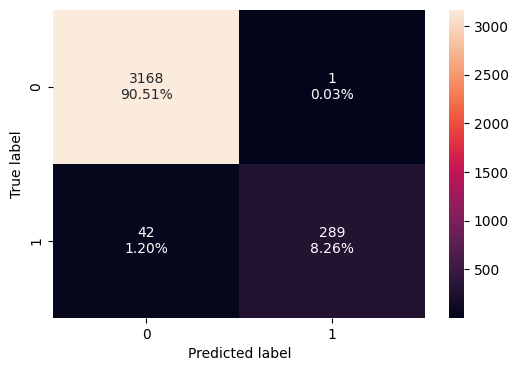

In [ ]:
confusion_matrix_sklearn(estimator, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_tune_perf_train = model_performance_classification_sklearn(estimator, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_perf_train

,Accuracy,Recall,Precision,F1
0,0.987714,0.873112,0.996552,0.930757


**Visualizing the Decision Tree**

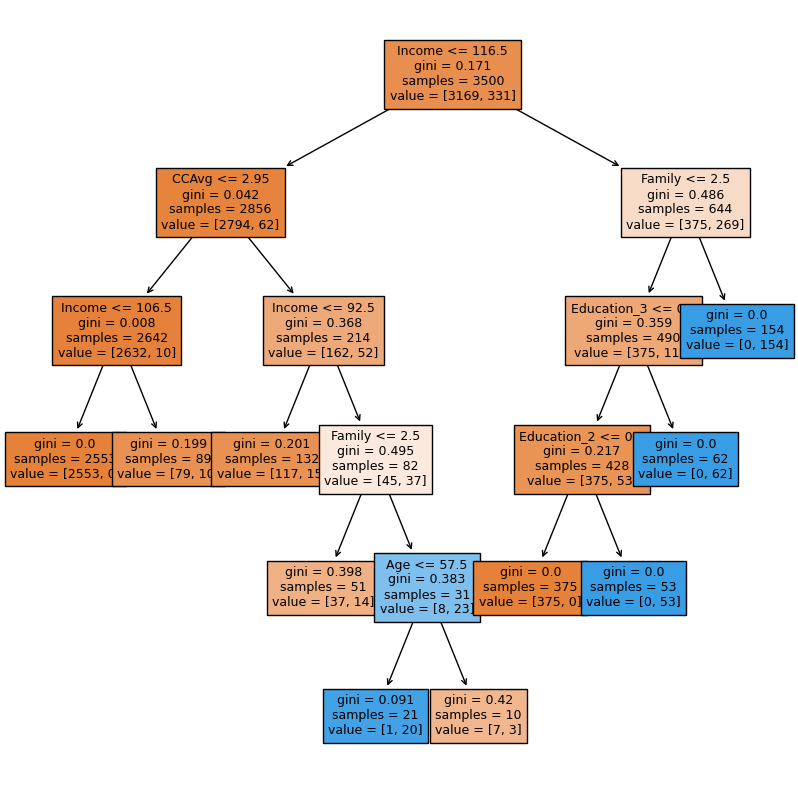

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- weights: [79.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Family <= 2.50
|   |   |   |   |--- weights: [37.00, 14.00] class: 0
|   |   |   |--- Family >  2.50
|   |   |   |   |--- Age <= 57.50
|   |   |   |   |   |--- weights: [1.00, 20.00] class: 1
|   |   |   |   |--- Age >  57.50
|   |   |   |   |   |--- weights: [7.00, 3.00] class: 0
|--- Income >  116.50
|   |--- Family <= 2.50
|   |   |--- Education_3 <= 0.50
|   |   |   |--- Education_2 <= 0.50
|   |   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |   |--- Education_2 >  0.50
|   |   |   |   |--- weights: [0.00, 53.00] class: 1
|   |   |--- Education_3 >  0.50
|   |   |   |--- weights: [0.00, 62.00] class: 1
|   |--- Family >  2.

In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                         Imp
Income              0.337681
Family              0.275581
Education_2         0.175687
Education_3         0.157286
CCAvg               0.042856
Age                 0.010908
CD_Account          0.000000
Online              0.000000
Securities_Account  0.000000
ZIPCode_91          0.000000
ZIPCode_92          0.000000
ZIPCode_93          0.000000
ZIPCode_94          0.000000
ZIPCode_95          0.000000
ZIPCode_96          0.000000
Mortgage            0.000000
CreditCard          0.000000


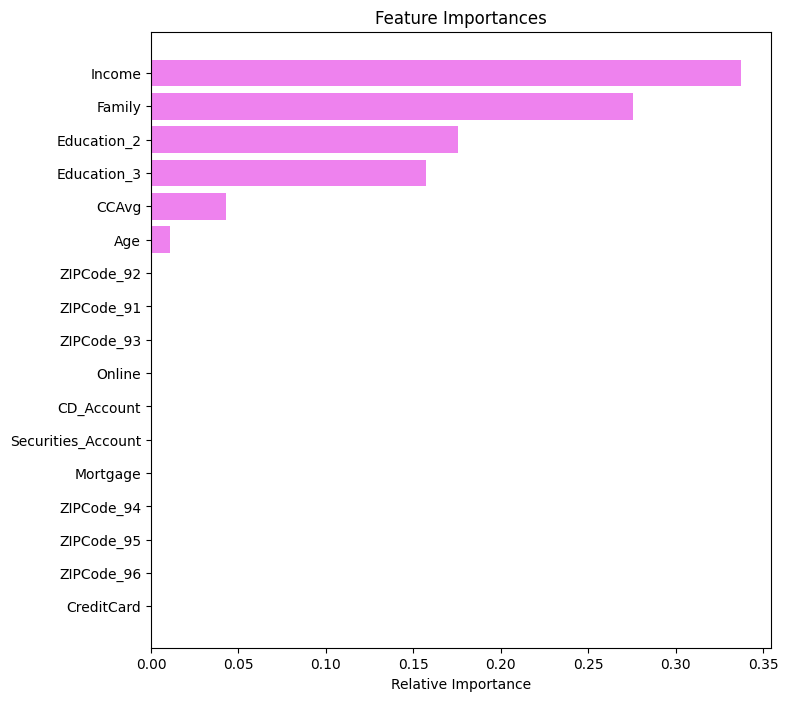

In [ ]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

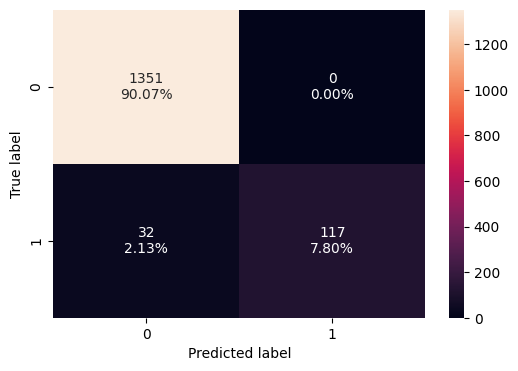

In [ ]:
confusion_matrix_sklearn(estimator, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [ ]:
decision_tree_tune_perf_test = model_performance_classification_sklearn(estimator, X_test, y_test) ## Complete the code to check performance on test data
decision_tree_tune_perf_test

,Accuracy,Recall,Precision,F1
0,0.978667,0.785235,1.0,0.879699


#### Cost-Complexity Pruning

In [ ]:
clf = DecisionTreeClassifier(random_state=1)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000214,0.001542
3,0.000242,0.002750
4,0.000250,0.003250
5,0.000268,0.004324
6,0.000272,0.004868
7,0.000276,0.005420
8,0.000381,0.005801
9,0.000527,0.006329


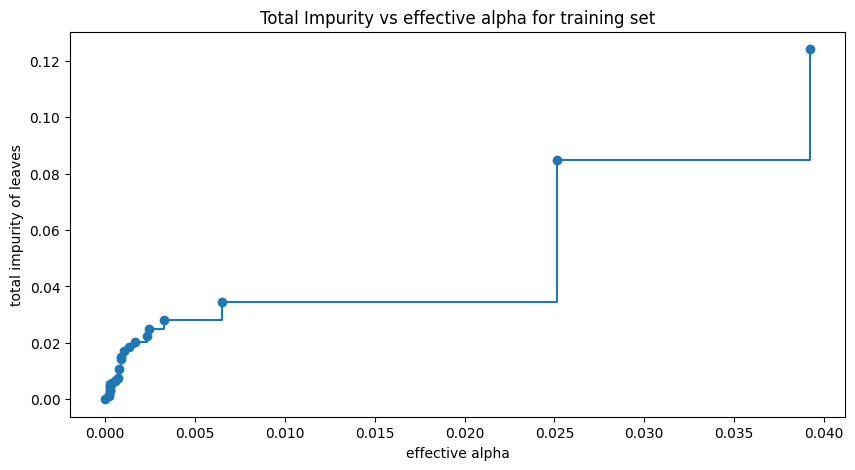

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

Next, we train a decision tree using effective alphas. The last value
in ``ccp_alphas`` is the alpha value that prunes the whole tree,
leaving the tree, ``clfs[-1]``, with one node.

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)     ## Complete the code to fit decision tree on training data
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596766


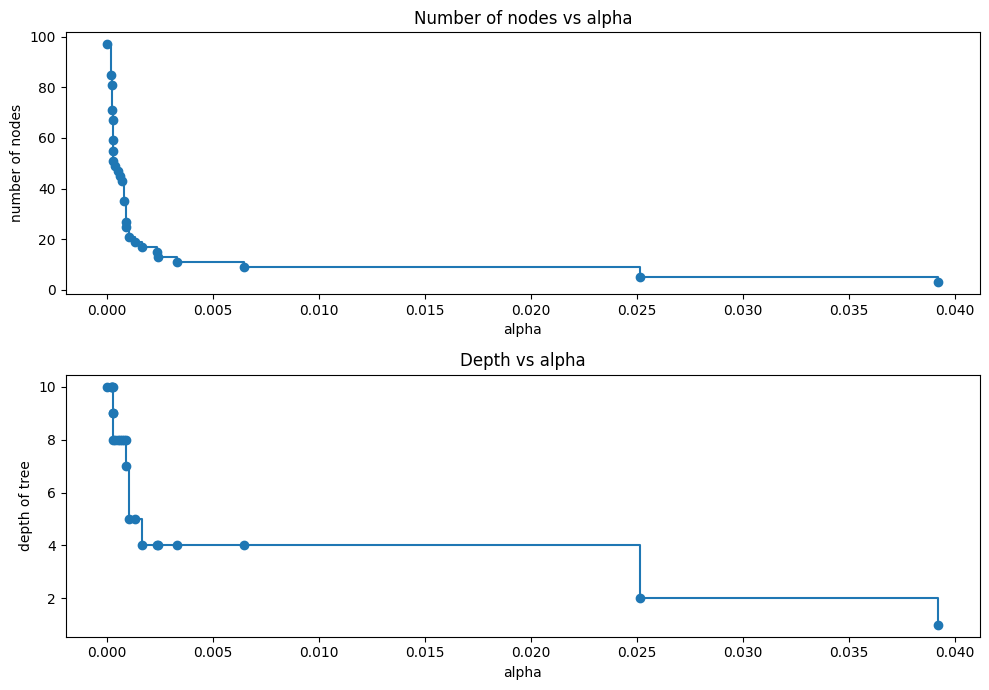

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

**Recall vs alpha for training and testing sets**

In [ ]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

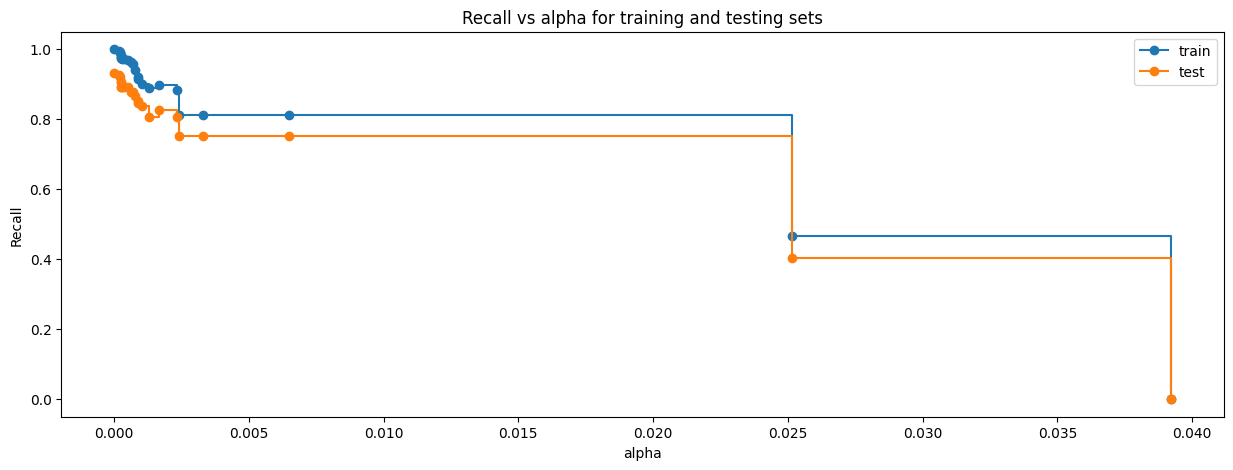

In [ ]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(random_state=1)


#### Post-Purning

In [ ]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha= 0.04708834100596766, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.04708834100596766,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

**Checking performance on training data**

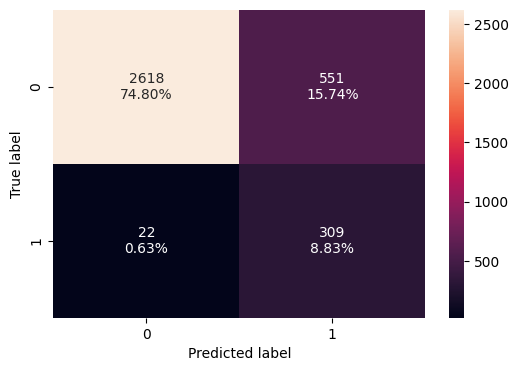

In [ ]:
confusion_matrix_sklearn(estimator_2, X_train, y_train) ## Complete the code to create confusion matrix for train data

In [ ]:
decision_tree_tune_post_train = model_performance_classification_sklearn(estimator_2, X_train, y_train) ## Complete the code to check performance on train data
decision_tree_tune_post_train

,Accuracy,Recall,Precision,F1
0,0.836286,0.933535,0.359302,0.518892


**Visualizing the Decision Tree**

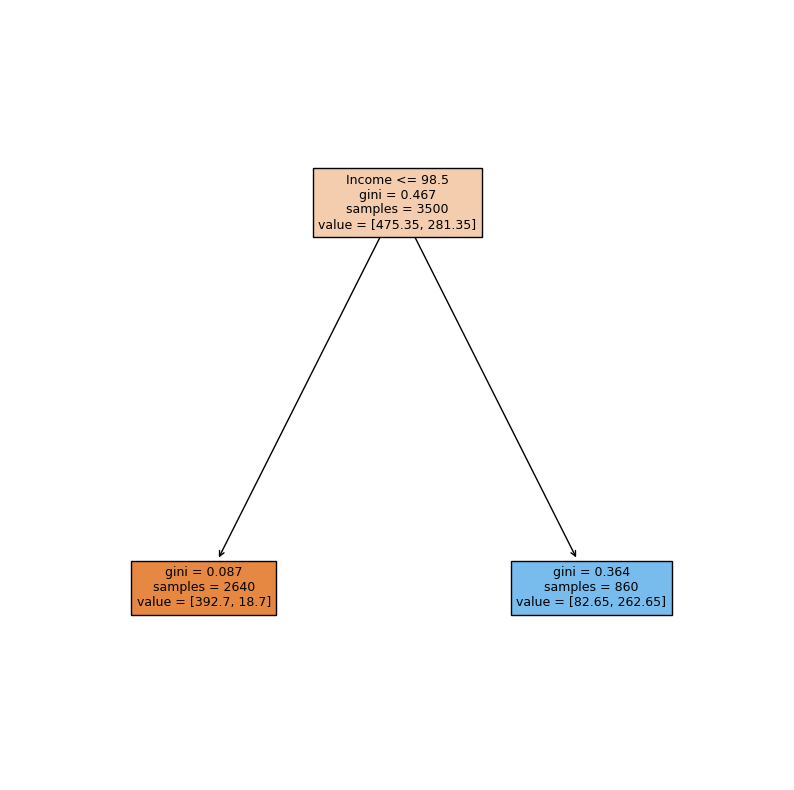

In [ ]:
plt.figure(figsize=(10, 10))
out = tree.plot_tree(
    estimator_2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(estimator_2, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- weights: [82.65, 262.65] class: 1



In [ ]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        estimator_2.feature_importances_, columns=["Imp"], index=X_train.columns
    ).sort_values(by="Imp", ascending=False)
)

                    Imp
Income              1.0
Age                 0.0
ZIPCode_91          0.0
Education_2         0.0
ZIPCode_96          0.0
ZIPCode_95          0.0
ZIPCode_94          0.0
ZIPCode_93          0.0
ZIPCode_92          0.0
CreditCard          0.0
Online              0.0
CD_Account          0.0
Securities_Account  0.0
Mortgage            0.0
CCAvg               0.0
Family              0.0
Education_3         0.0


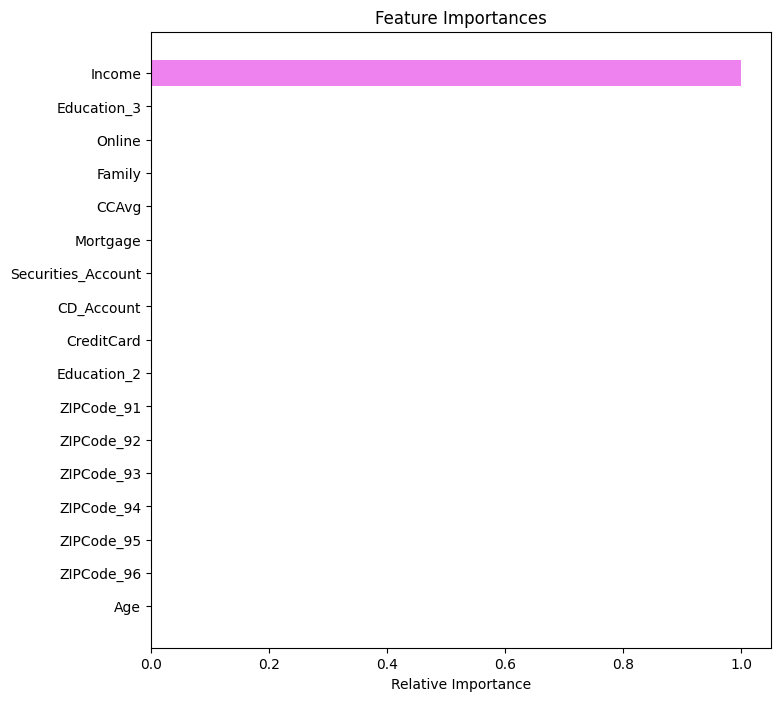

In [ ]:
importances = estimator_2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Checking performance on test data**

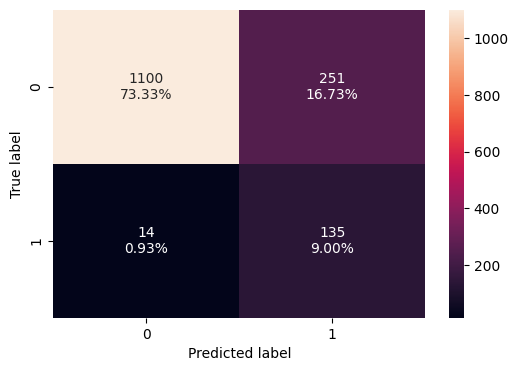

In [ ]:
confusion_matrix_sklearn(estimator_2, X_test, y_test)  # Complete the code to get the confusion matrix on test data

In [ ]:
decision_tree_tune_post_test = model_performance_classification_sklearn(estimator_2, X_test, y_test) ## Complete the code to get the model performance on test data
decision_tree_tune_post_test

,Accuracy,Recall,Precision,F1
0,0.823333,0.90604,0.349741,0.504673


## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [decision_tree_perf_train.T, decision_tree_tune_perf_train.T, decision_tree_tune_post_train.T], axis=1,
)
models_train_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.987714,0.836286
Recall,1.0,0.873112,0.933535
Precision,1.0,0.996552,0.359302
F1,1.0,0.930757,0.518892


In [ ]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [decision_tree_perf_test.T, decision_tree_tune_perf_test.T, decision_tree_tune_post_test.T], axis=1,) ## Complete the code to compare performance of test set

models_test_comp_df.columns = ["Decision Tree sklearn", "Decision Tree (Pre-Pruning)", "Decision Tree (Post-Pruning)"]
print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.986000,0.978667,0.823333
Recall,0.932886,0.785235,0.906040
Precision,0.926667,1.000000,0.349741
F1,0.929766,0.879699,0.504673


All three of the decision trees- "Decision Tree sklearn", "Decision Tree (Pre-Pruning)" and "Decision Tree (Post-Pruning)" have a better performance on training data than testing data, classifying them all as overfitted although the pre-pruned tree has a 5.1% better performance on training set than test set while the sklearn tree has an 8% better performance on training set than test set and the post-pruned tree performed the worst at 1.4% better on training set than test set.


The pre-pruned model uses six features for decision-making.
                
Income              
Family              
Education_2         
Education_3         
CCAvg               
Age                 

The pre-pruned decision tree has a similar F1 performance scores on training (.93) and test sets (.879).

This model uses less features for decision-making than the sklearn decision tree which utilized them all and more features than the post-pruned decision tree, which only used one feature (income), which is far too few features to make sound recommendations. We will eliminate the pos-pruned tree at this time and proceed with comparing the performance of the sklearn tree vs. the pre-pruned tree.

Evaluating only six features will result in a shorter prediction time than the inclusion of all original features in the sklearn tree and it is likely to be less complex in comparison and ultimately yield better results on unseen data.

We'll move ahead with the pre-pruned decision tree as our final model.

## Actionable Insights and Business Recommendations

**What recommendations would you suggest to the bank?**

Based on the observations, the following conclusions can be drawn:

Both the "Decision Tree sklearn" and "Decision Tree (Pre-Pruning)" models exhibit signs of overfitting. This is indicated by the better performance on the training data compared to the testing data.

**Performance Comparison:**

*Pre-Pruning Model:*
This model shows a 5.1% better performance on the training set compared to the test set. It uses fewer features (six) for decision-making, which results in a more concise model that is less likely to capture noise in the data. Despite the signs of overfitting, the pre-pruned model achieves similar F1 performance scores on both the training (.93) and test (.879) sets. This suggests that the pre-pruning has effectively managed to reduce the complexity of the model, which can be beneficial for performance on unseen data. The pre-pruned decision tree uses fewer features, which helps in reducing model complexity and may also contribute to better performance on unseen data. Reduced complexity often translates to a shorter prediction time and potentially more robust results when applied to new data. The use of fewer features in the pre-pruned model suggests that it is designed to avoid capturing noise and focus on the most relevant features for decision-making. This can be advantageous in improving generalization and model performance on unseen data.

*Sklearn Decision Tree:* This model has an 8% better performance on the training set compared to the test set, indicating a higher degree of overfitting compared to the pre-pruned model. The sklearn decision tree uses more features and likely has a more complex structure, contributing to its greater performance disparity between training and testing data.

**Model Evaluation:**

The pre-pruned decision tree's similar F1 scores on training and test sets indicate that it has a more balanced performance and is less likely to be overfitting compared to the sklearn decision tree. It manages to maintain high performance while using fewer features, suggesting that it is a more efficient and potentially more generalizable model.

In summary, while both models exhibit overfitting, the pre-pruned decision tree, with its reduced feature set and more balanced performance on training and test sets, demonstrates better generalization and efficiency compared to the more complex sklearn decision tree.


___